# Learning from labelled and unlabelled data using GFMM

This example shows how to use various learning algorithms of the general fuzzy min-max (GFMM) classifier to learning from the datasets including both labelled and unlabelled samples.

### Loading the labelled and unlabelled samples from an example dataset in the folder 'dataset'

File 'syn_num_train.csv' contains all labelled samples for a training dataset. File 'syn_num_train_labeled_unlabelled_mix.csv' contains both labelled and unlabelled samples which are created from the 'syn_num_train.csv' file by eliminating randomly the class labels of several samples. File 'syn_num_test.csv' contains 1000 testing samples all of which are labelled.

This example compares a trained GFMM model learning from fully labelled training data and a GFMM model trained on labelled and unlabelled data based on the resulting hyperboxes and their classification performance.

In [1]:
%matplotlib notebook

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

In [4]:
# Get the path to the this jupyter notebook file
this_notebook_dir = os.path.dirname(os.path.abspath("__file__"))
this_notebook_dir

'C:\\hyperbox-brain\\examples\\other_learning_ability_gfmm'

In [5]:
# Get the home folder of the hyperbox-brain toolbox
from pathlib import Path
project_dir = Path(this_notebook_dir).parent.parent
project_dir

WindowsPath('C:/hyperbox-brain')

In [6]:
# Create the path to the training and testing files
labelled_training_file = os.path.join(project_dir, Path("dataset/syn_num_train.csv"))
labelled_unlabelled_training_file = os.path.join(project_dir, Path("dataset/syn_num_train_labeled_unlabelled_mix.csv"))
testing_file = os.path.join(project_dir, Path("dataset/syn_num_test.csv"))

In [7]:
labelled_training_file

'C:\\hyperbox-brain\\dataset\\syn_num_train.csv'

In [8]:
labelled_unlabelled_training_file

'C:\\hyperbox-brain\\dataset\\syn_num_train_labeled_unlabelled_mix.csv'

In [9]:
testing_file

'C:\\hyperbox-brain\\dataset\\syn_num_test.csv'

In [10]:
# Create training and testing data sets
df_labelled_train = pd.read_csv(labelled_training_file, header=None)
df_labelled_unlabelled_train = pd.read_csv(labelled_unlabelled_training_file, header=None)
df_test = pd.read_csv(testing_file, header=None)

Xy_labelled_train = df_labelled_train.to_numpy()
Xy_lablled_unlabelled_train = df_labelled_unlabelled_train.to_numpy()
Xy_test = df_test.to_numpy()

Xtr_labelled = Xy_labelled_train[:, :-1]
ytr_labelled = Xy_labelled_train[:, -1]

Xtr_labelled_unlabelled = Xy_lablled_unlabelled_train[:, :-1]
ytr_labelled_unlabelled = Xy_lablled_unlabelled_train[:, -1]

Xtest = Xy_test[:, :-1]
ytest = Xy_test[:, -1]

In [11]:
import numpy as np
from matplotlib import pyplot

In [12]:
class_label = ['Unlabelled class', '1', '2']
n_missing = np.isnan(ytr_labelled_unlabelled).sum()
n_class_1 = (ytr_labelled_unlabelled == 1).sum()
n_class_2 = (ytr_labelled_unlabelled == 2).sum()
class_distribution = [n_missing, n_class_1, n_class_2]

<IPython.core.display.Javascript object>


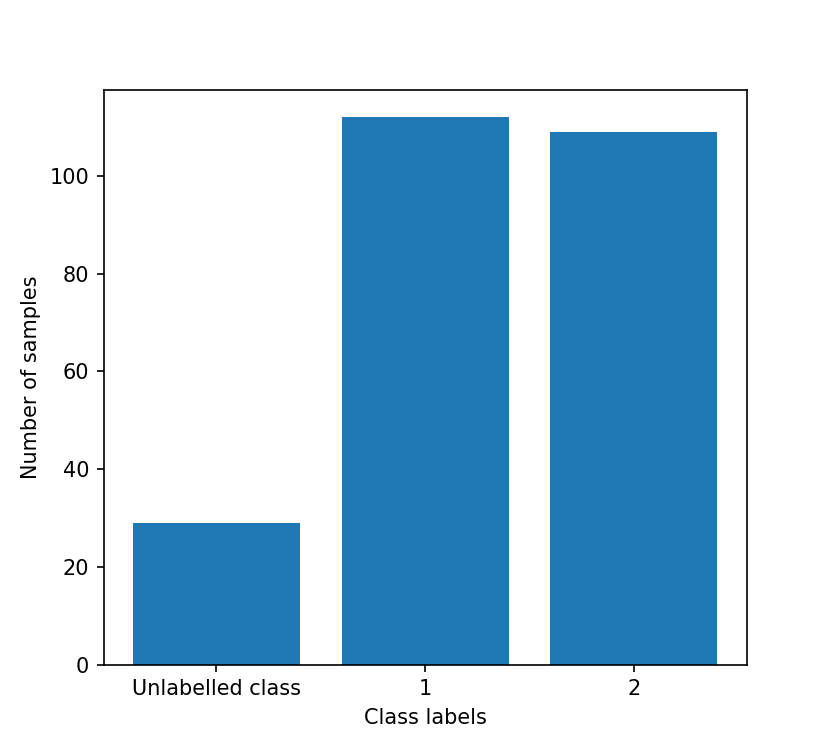

In [13]:
# plot the distribution
pyplot.bar(class_label, class_distribution)
pyplot.xlabel('Class labels')
pyplot.ylabel('Number of samples')
pyplot.show()

#### Showing samples corresponding to missing values and class labels

<IPython.core.display.Javascript object>


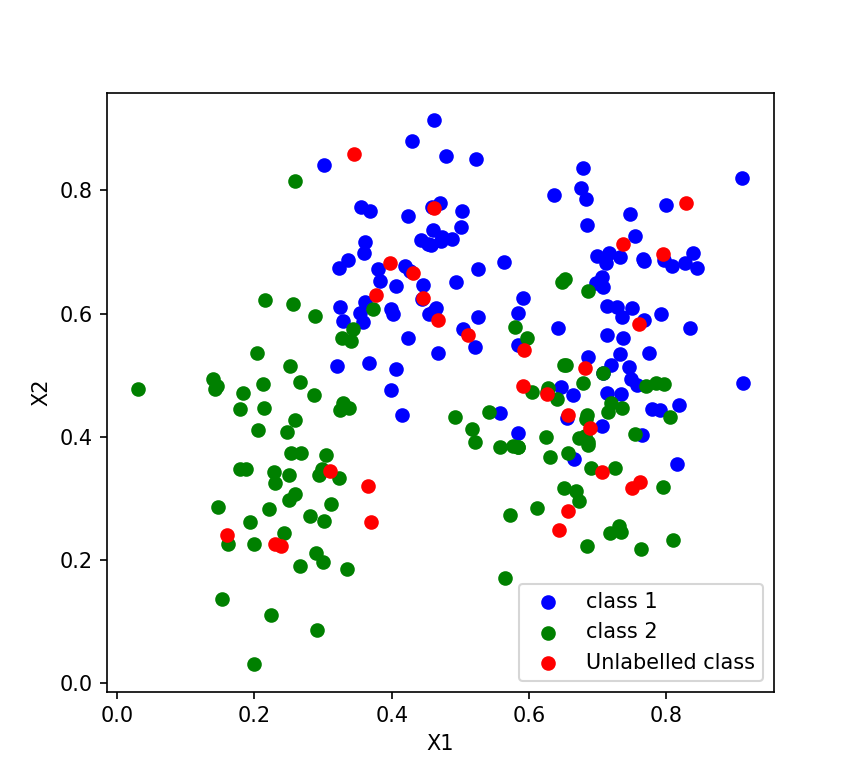

In [14]:
import matplotlib.pyplot as plt
colours = ['red', 'blue', 'green']
labels = ['Unlabelled class', 'class 1', 'class 2']
classes = np.unique(ytr_labelled_unlabelled)
fig1, ax1 = plt.subplots()
for i in classes:
    if np.isnan(i) == True:
        data = Xtr_labelled_unlabelled[np.isnan(ytr_labelled_unlabelled)]
        color = colours[0]
        label = labels[0]
    else:
        data = Xtr_labelled_unlabelled[ytr_labelled_unlabelled == i]  
        color = colours[int(i)]
        label = labels[int(i)]
    ax1.scatter(        
        data[:, 0],        
        data[:, 1],
        color=color,        
        label=label  
    )

ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.legend(loc='lower right')

plt.show()

Next, we will build general fuzzy min-max neural networks using various learning algorithms from unlabelled and labelled data.

## 1. Original incremental learning algorithm for GFMM

In [15]:
from hbbrain.numerical_data.incremental_learner.onln_gfmm import OnlineGFMM

In [16]:
# Initializing parameters
theta = 0.2
theta_min = 0.2
gamma = 1
is_draw = False

#### 1.1 Training a GFMM model using the original incremental learning algorithm on a fully labelled training set

In [17]:
onln_gfmm_clf_labelled = OnlineGFMM(theta=theta, theta_min=theta_min, gamma=gamma, is_draw=is_draw)
onln_gfmm_clf_labelled.fit(Xtr_labelled, ytr_labelled)

OnlineGFMM(C=array([1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1]),
           V=array([[0.334755  , 0.54567   ],
       [0.60358   , 0.413255  ],
       [0.71185   , 0.67467   ],
       [0.66395   , 0.48815495],
       [0.15331   , 0.03      ],
       [0.17884   , 0.26124   ],
       [0.50058   , 0.62858   ],
       [0.13903   , 0.44711   ],
       [0.03      , 0.28498   ],
       [0.56487   , 0.17003   ],
       [0.49255   , 0.38293   ],
       [0.39868   , 0.4497275 ],
       [0.30123   , 0.7592    ],
       [0.581545  , 0.54123   ],
       [0.25929   , 0.81558   ],
       [0.6...
       [0.83355   , 0.65933   ],
       [0.33484   , 0.22603   ],
       [0.37033   , 0.44704   ],
       [0.68491   , 0.7921    ],
       [0.3197    , 0.62174   ],
       [0.14737   , 0.48239   ],
       [0.76254   , 0.34978   ],
       [0.59077   , 0.4497175 ],
       [0.581535  , 0.54842   ],
       [0.47952   , 0.91371   ],
       [0.66394   , 0.62857   ],
       [0.25929   , 0.8155

#### Display decision boundaries among classes if input data are 2-dimensional

<IPython.core.display.Javascript object>


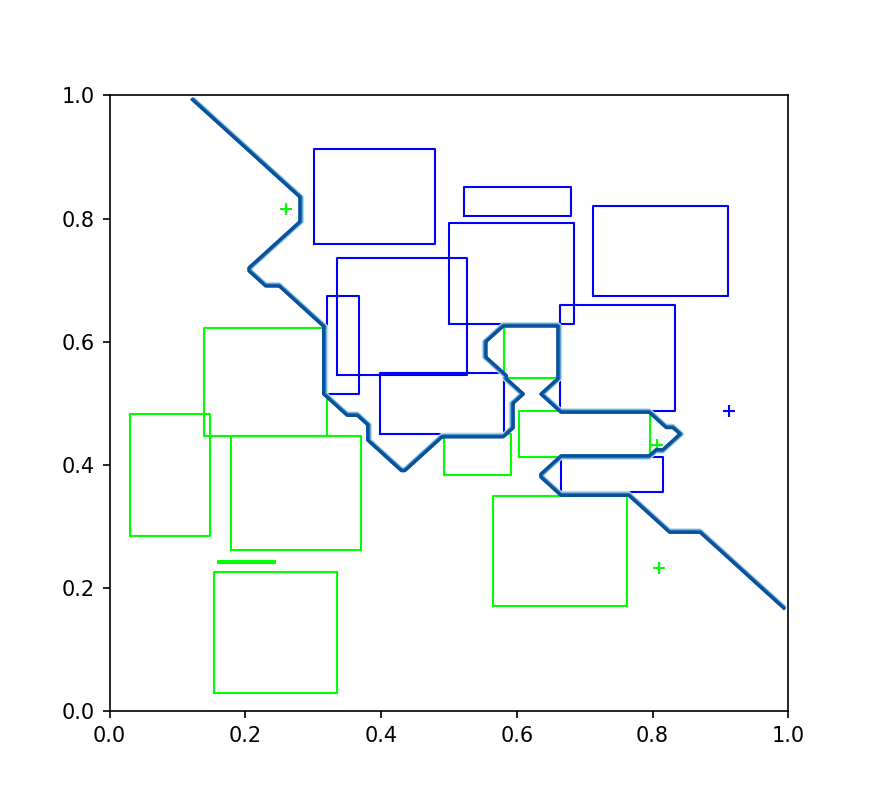

In [18]:
onln_gfmm_clf_labelled.draw_hyperbox_and_boundary("The trained GFMM classifier and its decision boundaries on a fully labelled dataset")

In [19]:
print("Number of hyperboxes = ", onln_gfmm_clf_labelled.get_n_hyperboxes())

Number of hyperboxes =  22


#### Prediction

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
# Using prediction returning only a predicted class for each input sample
y_pred_labelled = onln_gfmm_clf_labelled.predict(Xtest)
acc = accuracy_score(ytest, y_pred_labelled)
print(f'Accuracy (trained on a fully labelled dataset) = {acc * 100: .2f}%')

Accuracy (trained on a fully labelled dataset) =  86.10%


In [22]:
# Using prediction returning probability values for classes with respect to each input sample
onln_gfmm_clf_labelled.predict_proba(Xtest[0:10])

array([[0.50692844, 0.49307156],
       [0.5067865 , 0.4932135 ],
       [0.48419044, 0.51580956],
       [0.51756754, 0.48243246],
       [0.49898253, 0.50101747],
       [0.50386085, 0.49613915],
       [0.49633584, 0.50366416],
       [0.44839455, 0.55160545],
       [0.4878477 , 0.5121523 ],
       [0.48650536, 0.51349464]])

In [23]:
# Using prediction returning membership values for classes with respect to each input sample
onln_gfmm_clf_labelled.predict_with_membership(Xtest[0:10])

array([[1.        , 0.972665  ],
       [1.        , 0.9732175 ],
       [0.9387    , 1.        ],
       [1.        , 0.932115  ],
       [0.986965  , 0.99099   ],
       [1.        , 0.98467495],
       [0.98545   , 1.        ],
       [0.81289   , 1.        ],
       [0.93918   , 0.98597   ],
       [0.94744   , 1.        ]])

#### 1.2 Training a GFMM model using the original incremental learning algorithm on a labelled and unlabelled training set

In [24]:
onln_gfmm_clf_labelled_unlabelled = OnlineGFMM(theta=theta, theta_min=theta_min, gamma=gamma, is_draw=is_draw)
onln_gfmm_clf_labelled_unlabelled.fit(Xtr_labelled_unlabelled, ytr_labelled_unlabelled)

OnlineGFMM(C=array([1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1]),
           V=array([[0.334755  , 0.54567   ],
       [0.60358   , 0.413255  ],
       [0.71185   , 0.67467   ],
       [0.66395   , 0.48815495],
       [0.15331   , 0.03      ],
       [0.17884   , 0.26124   ],
       [0.50058   , 0.62858   ],
       [0.13903   , 0.44711   ],
       [0.03      , 0.28498   ],
       [0.56487   , 0.17003   ],
       [0.49255   , 0.38293   ],
       [0.39868   , 0.439005  ],
       [0.30123   , 0.7592    ],
       [0.57962   , 0.56029   ],
       [0.25929   , 0.81558   ],
       [0.665...
       [0.83355   , 0.65933   ],
       [0.33484   , 0.22603   ],
       [0.37033   , 0.44704   ],
       [0.68491   , 0.7921    ],
       [0.3197    , 0.62174   ],
       [0.14737   , 0.48239   ],
       [0.76254   , 0.34978   ],
       [0.5843    , 0.438995  ],
       [0.59235   , 0.54842   ],
       [0.47952   , 0.91371   ],
       [0.66394   , 0.62857   ],
       [0.25929   , 0.81

#### Display decision boundaries among classes if input data are 2-dimensional

<IPython.core.display.Javascript object>


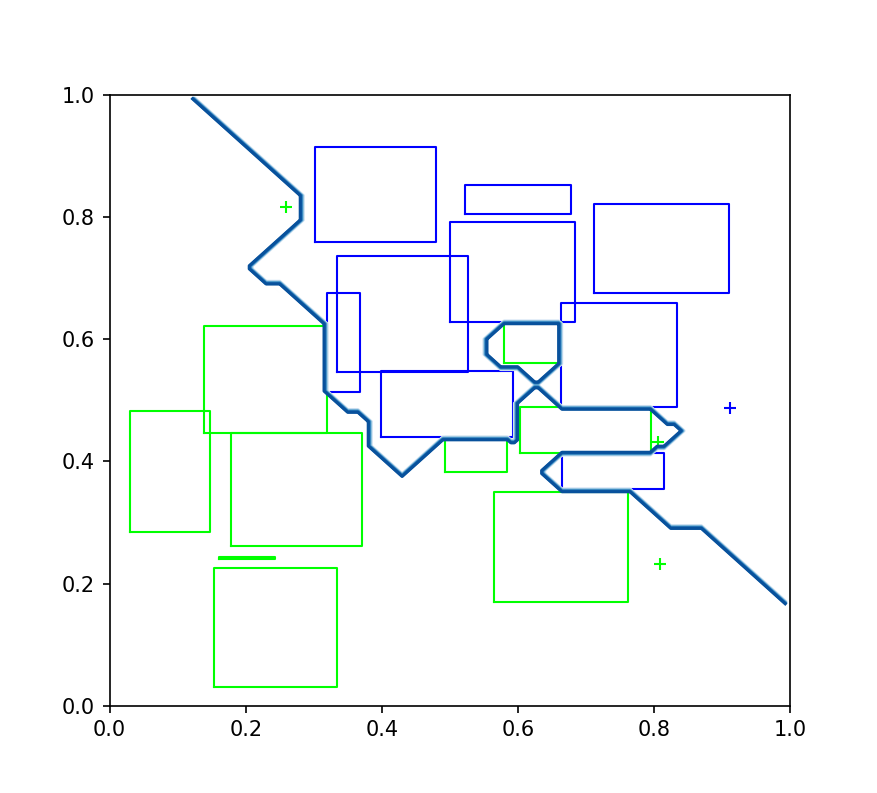

In [25]:
onln_gfmm_clf_labelled_unlabelled.draw_hyperbox_and_boundary("The trained GFMM classifier and its decision boundaries on a labelled and unlabelled dataset")

In [26]:
print("Number of hyperboxes = ", onln_gfmm_clf_labelled_unlabelled.get_n_hyperboxes())

Number of hyperboxes =  22


We can see that in this case all unlabelled samples were absorbed and assigned to suitable class labels to form hyperboxes. All unlaballed samples located in the areas dominated by samples belonging to only one class were classified correctly to the same class. Only samples in the overlapping areas between two classes resulted in little difference in the trained GFMM models between the model trained on a fully labelled dataset and the model trained on an unlabelled and labelled dataset.

#### Prediction

In [27]:
# Using prediction returning only a predicted class for each input sample
y_pred_labelled_unlabelled = onln_gfmm_clf_labelled_unlabelled.predict(Xtest)
acc = accuracy_score(ytest, y_pred_labelled_unlabelled)
print(f'Accuracy (trained on a mixed labelled and unlabelled dataset) = {acc * 100: .2f}%')

Accuracy (trained on a mixed labelled and unlabelled dataset) =  86.00%


In [28]:
# Using prediction returning probability values for classes with respect to each input sample
onln_gfmm_clf_labelled_unlabelled.predict_proba(Xtest[0:10])

array([[0.50692844, 0.49307156],
       [0.50955544, 0.49044456],
       [0.48419044, 0.51580956],
       [0.51705239, 0.48294761],
       [0.50170709, 0.49829291],
       [0.50386085, 0.49613915],
       [0.49633584, 0.50366416],
       [0.44839455, 0.55160545],
       [0.49076276, 0.50923724],
       [0.48650536, 0.51349464]])

In [29]:
# Using prediction returning membership values for classes with respect to each input sample
onln_gfmm_clf_labelled_unlabelled.predict_with_membership(Xtest[0:10])

array([[1.        , 0.972665  ],
       [1.        , 0.962495  ],
       [0.9387    , 1.        ],
       [1.        , 0.93404   ],
       [0.99778   , 0.99099   ],
       [1.        , 0.98467495],
       [0.98545   , 1.        ],
       [0.81289   , 1.        ],
       [0.943965  , 0.9795    ],
       [0.94744   , 1.        ]])

## 2. Improved online learning algorithm for GFMM (IOL-GFMM)

In [30]:
from hbbrain.numerical_data.incremental_learner.iol_gfmm import ImprovedOnlineGFMM

#### 2.1 Training a GFMM model using the improved online learning algorithm on a fully labelled training set

In [31]:
iol_gfmm_clf_labelled = ImprovedOnlineGFMM(theta=theta, gamma=gamma, is_draw=is_draw)
iol_gfmm_clf_labelled.fit(Xtr_labelled, ytr_labelled)

ImprovedOnlineGFMM(C=array([1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 1]),
                   N_samples=array([29,  3, 17, 13, 12, 29, 11,  8,  2,  9, 27,  1, 10,  1,  1,  4, 13,
        1,  3,  3, 13,  3,  1,  1,  1,  1,  1,  1,  2,  1,  2,  1,  1,  1,
        1,  1,  1,  5,  2,  1,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1]),
                   V=array([[0.33593, 0.55942],
       [0.77074, 0.48234],
       [0.71185, 0.67467],
       [0.64586, 0.41654],
       [0.15331, 0...
       [0.65327, 0.51585],
       [0.57962, 0.57837],
       [0.66562, 0.36352],
       [0.68408, 0.43479],
       [0.70743, 0.50325],
       [0.70647, 0.65933],
       [0.28822, 0.62174],
       [0.24341, 0.2432 ],
       [0.34044, 0.55512],
       [0.75421, 0.41466],
       [0.55819, 0.39125],
       [0.59655, 0.56029],
       [0.71946, 0.45413],
       [0.36745, 0.52006],
       [0.91185, 0.48697]

#### Display decision boundaries among classes if input data are 2-dimensional

<IPython.core.display.Javascript object>


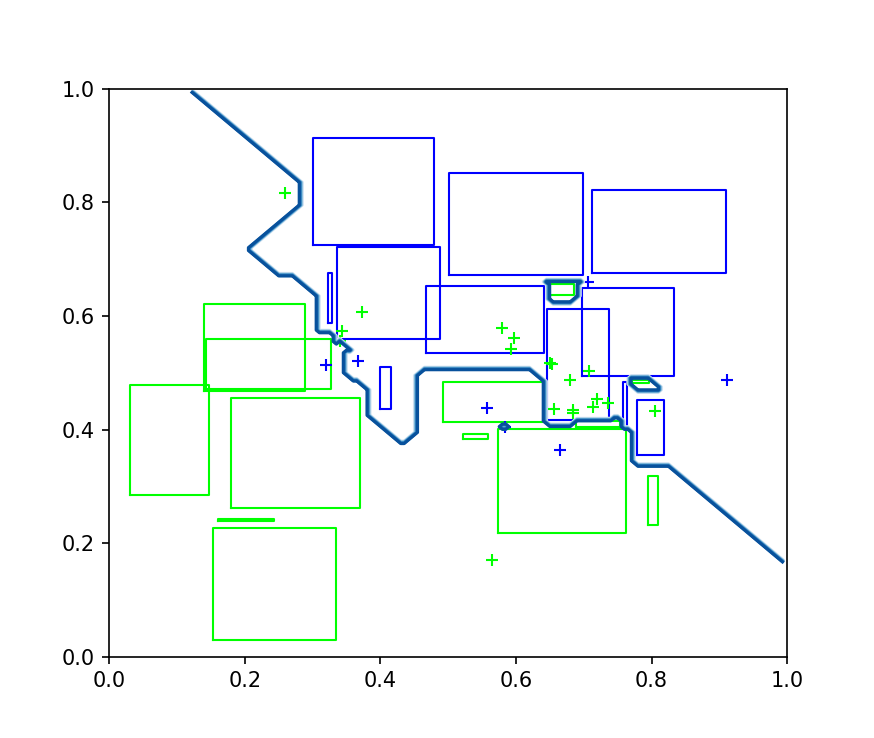

In [32]:
iol_gfmm_clf_labelled.draw_hyperbox_and_boundary("The trained GFMM classifier and its decision boundaries on a fully labelled dataset")

In [33]:
print("Number of hyperboxes = ", iol_gfmm_clf_labelled.get_n_hyperboxes())

Number of hyperboxes =  50


#### Prediction

In [34]:
# Using prediction returning only a predicted class for each input sample
y_pred_labelled_iol = iol_gfmm_clf_labelled.predict(Xtest)
acc_iol = accuracy_score(ytest, y_pred_labelled_iol)
print(f'Accuracy (trained on a fully labelled dataset) = {acc_iol * 100: .2f}%')

Accuracy (trained on a fully labelled dataset) =  87.90%


In [35]:
# Using prediction returning probability values for classes with respect to each input sample
iol_gfmm_clf_labelled.predict_proba(Xtest[0:10])

array([[0.49576188, 0.50423812],
       [0.48655857, 0.51344143],
       [0.48198338, 0.51801662],
       [0.50614609, 0.49385391],
       [0.49059122, 0.50940878],
       [0.50281577, 0.49718423],
       [0.49979902, 0.50020098],
       [0.44839455, 0.55160545],
       [0.49441327, 0.50558673],
       [0.48773256, 0.51226744]])

In [36]:
# Using prediction returning membership values for classes with respect to each input sample
iol_gfmm_clf_labelled.predict_with_membership(Xtest[0:10])

array([[0.98319, 1.     ],
       [0.94134, 0.99335],
       [0.93044, 1.     ],
       [0.98576, 0.96182],
       [0.96306, 1.     ],
       [1.     , 0.9888 ],
       [0.98227, 0.98306],
       [0.81289, 1.     ],
       [0.9779 , 1.     ],
       [0.94744, 0.9951 ]])

#### 2.2 Training a GFMM model using the improved online learning algorithm on a labelled and unlabelled training set

In [37]:
iol_gfmm_clf_labelled_unlabelled = ImprovedOnlineGFMM(theta=theta, gamma=gamma, is_draw=is_draw)
iol_gfmm_clf_labelled_unlabelled.fit(Xtr_labelled_unlabelled, ytr_labelled_unlabelled)

ImprovedOnlineGFMM(C=array([1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1]),
                   N_samples=array([22,  3, 15, 15,  7,  3, 22, 10, 11,  1, 10, 23,  1, 13,  1,  1,  4,
        7,  7,  3,  3,  3,  9,  5,  2,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        2,  1,  1,  1,  1,  1,  1,  3,  1,  2,  2,  1,  1,  1,  1,  1,  1]),
                   V=array([[0.33593, 0.55942],
       [0.77074, 0.48234],
       [0.71185, 0.67467],
       [0.64586, 0.41654],
       [0.1533...
       [0.76369, 0.48412],
       [0.80583, 0.43242],
       [0.80969, 0.31878],
       [0.65327, 0.51585],
       [0.57962, 0.57837],
       [0.66562, 0.36352],
       [0.68408, 0.43479],
       [0.70743, 0.50325],
       [0.70647, 0.65933],
       [0.28822, 0.62174],
       [0.34044, 0.55512],
       [0.75421, 0.41466],
       [0.55819, 0.39125],
       [0.59655, 0.56029],
       [0.71946, 0.454

#### Display decision boundaries among classes if input data are 2-dimensional

<IPython.core.display.Javascript object>


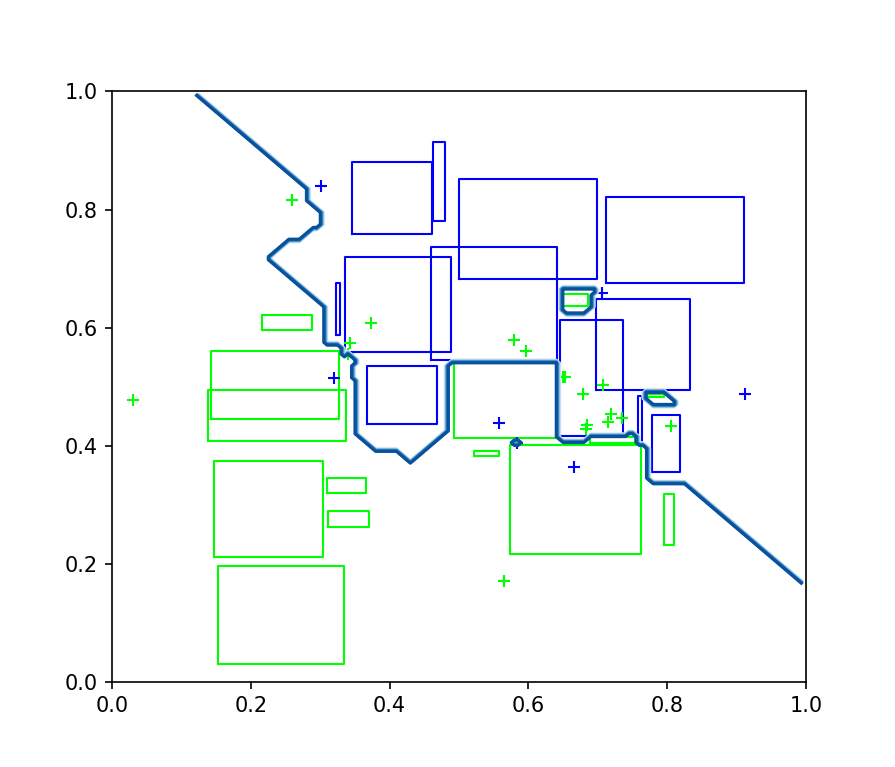

In [38]:
iol_gfmm_clf_labelled_unlabelled.draw_hyperbox_and_boundary("The trained GFMM classifier and its decision boundaries on a labelled and unlabelled dataset")

We can see that the IOL-GFMM algorithm can also learn from a labelled and unlabelled dataset. Hyperboxes which have been formed from unlabelled samples will be assigned a suitable class when they cover new labelled samples. If not, these hyperboxes will create unlabelled clusters. In this case, all unlabelled hyperboxes were assigned corresponding labels. The classification performance of the model trained on both labelled and unlabelled samples is slightly less than that of the model trained on a fully labelled dataset. 

In [39]:
print("Number of hyperboxes = ", iol_gfmm_clf_labelled_unlabelled.get_n_hyperboxes())

Number of hyperboxes =  51


#### Prediction

In [40]:
# Using prediction returning only a predicted class for each input sample
y_pred_labelled_unlabelled_iol = iol_gfmm_clf_labelled_unlabelled.predict(Xtest)
acc_iol_labelled_unlabelled = accuracy_score(ytest, y_pred_labelled_unlabelled_iol)
print(f'Accuracy (trained on a mixed labelled and unlabelled dataset) = {acc_iol_labelled_unlabelled * 100: .2f}%')

Accuracy (trained on a mixed labelled and unlabelled dataset) =  87.50%


In [41]:
# Using prediction returning membership values for classes with respect to each input sample
iol_gfmm_clf_labelled_unlabelled.predict_with_membership(Xtest[0:10])

array([[0.98319, 1.     ],
       [0.98204, 0.99335],
       [0.93044, 1.     ],
       [0.97525, 1.     ],
       [0.96306, 1.     ],
       [1.     , 0.9888 ],
       [0.98227, 0.98306],
       [0.81937, 1.     ],
       [0.9779 , 1.     ],
       [0.94744, 1.     ]])

In [42]:
# Using prediction returning probability values for classes with respect to each input sample
iol_gfmm_clf_labelled_unlabelled.predict_proba(Xtest[0:10])

array([[0.49576188, 0.50423812],
       [0.49713727, 0.50286273],
       [0.48198338, 0.51801662],
       [0.49373497, 0.50626503],
       [0.49059122, 0.50940878],
       [0.50281577, 0.49718423],
       [0.49979902, 0.50020098],
       [0.45035919, 0.54964081],
       [0.49441327, 0.50558673],
       [0.48650536, 0.51349464]])

## 3. Accelerated agglomerative learning algorithm for GFMM (AGGLO-2)

In [43]:
from hbbrain.numerical_data.batch_learner.accel_agglo_gfmm import AccelAgglomerativeLearningGFMM

#### 3.1 Training a GFMM model using the accelerated agglomerative learning algorithm on a fully labelled training set

In [44]:
# Initialise parameters
theta = 0.2
gamma = 1
min_simil = 0
simil_measure = 'long'
is_draw = False

In [45]:
agglo2_clf_labelled = AccelAgglomerativeLearningGFMM(theta=theta, gamma=gamma, min_simil=min_simil, simil_measure=simil_measure, is_draw=is_draw)
agglo2_clf_labelled.fit(Xtr_labelled, ytr_labelled)

AccelAgglomerativeLearningGFMM(min_simil=0, simil_measure='long', theta=0.2)

#### Display decision boundaries among classes if input data are 2-dimensional

<IPython.core.display.Javascript object>


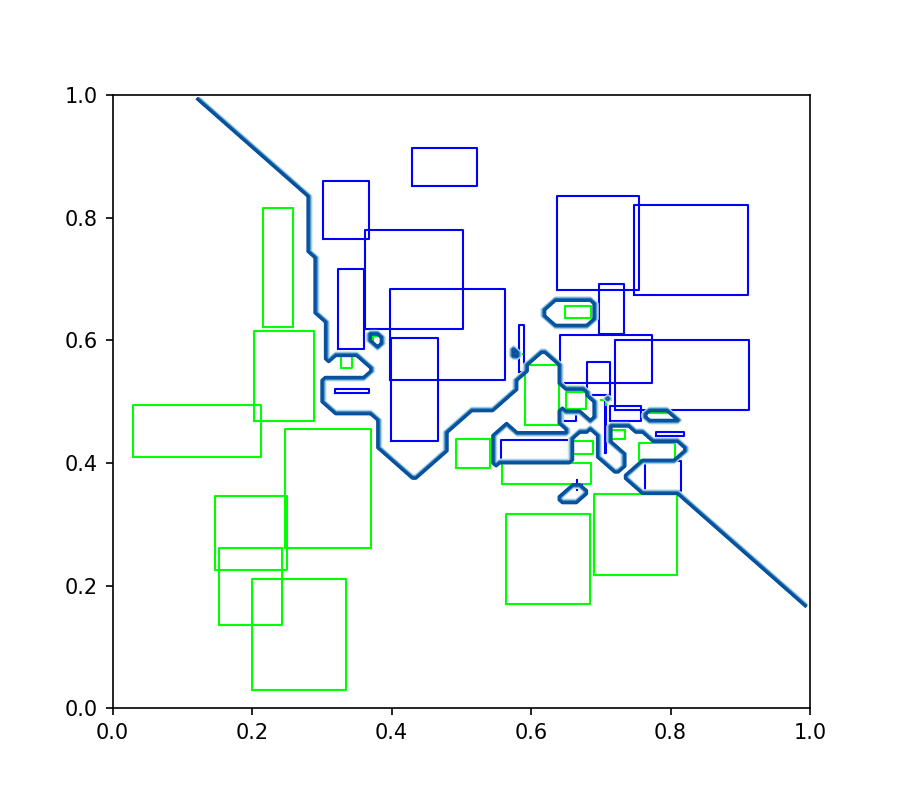

In [46]:
agglo2_clf_labelled.draw_hyperbox_and_boundary("The trained GFMM classifier and its decision boundaries on a fully labelled dataset")

In [47]:
print("Number of hyperboxes = ", agglo2_clf_labelled.get_n_hyperboxes())

Number of hyperboxes =  43


#### Prediction

In [48]:
# Using prediction returning only a predicted class for each input sample
y_pred_labelled_agglo2 = agglo2_clf_labelled.predict(Xtest)
acc_agglo2_labelled = accuracy_score(ytest, y_pred_labelled_agglo2)
print(f'Accuracy (trained on a fully labelled dataset) = {acc_agglo2_labelled * 100: .2f}%')

Accuracy (trained on a fully labelled dataset) =  87.30%


In [49]:
# Using prediction returning membership values for classes with respect to each input sample
agglo2_clf_labelled.predict_with_membership(Xtest[0:10])

array([[0.98924, 0.98094],
       [0.98112, 0.96336],
       [0.93044, 0.99767],
       [0.98576, 0.93404],
       [0.96956, 1.     ],
       [0.9989 , 0.9888 ],
       [0.98227, 0.98306],
       [0.81289, 1.     ],
       [0.9779 , 1.     ],
       [0.94744, 0.9951 ]])

In [50]:
# Using prediction returning probability values for classes with respect to each input sample
agglo2_clf_labelled.predict_proba(Xtest[0:10])

array([[0.50210641, 0.49789359],
       [0.50456677, 0.49543323],
       [0.48256583, 0.51743417],
       [0.51347015, 0.48652985],
       [0.49227239, 0.50772761],
       [0.50254062, 0.49745938],
       [0.49979902, 0.50020098],
       [0.44839455, 0.55160545],
       [0.49441327, 0.50558673],
       [0.48773256, 0.51226744]])

#### 3.2 Training a GFMM model using the accelerated agglomerative learning algorithm on a mixed labelled and unlabelled training set

In [51]:
agglo2_clf_labelled_unlabelled = AccelAgglomerativeLearningGFMM(theta=theta, gamma=gamma, min_simil=min_simil, simil_measure=simil_measure, is_draw=is_draw)
agglo2_clf_labelled_unlabelled.fit(Xtr_labelled_unlabelled, ytr_labelled_unlabelled)

AccelAgglomerativeLearningGFMM(min_simil=0, simil_measure='long', theta=0.2)

<IPython.core.display.Javascript object>


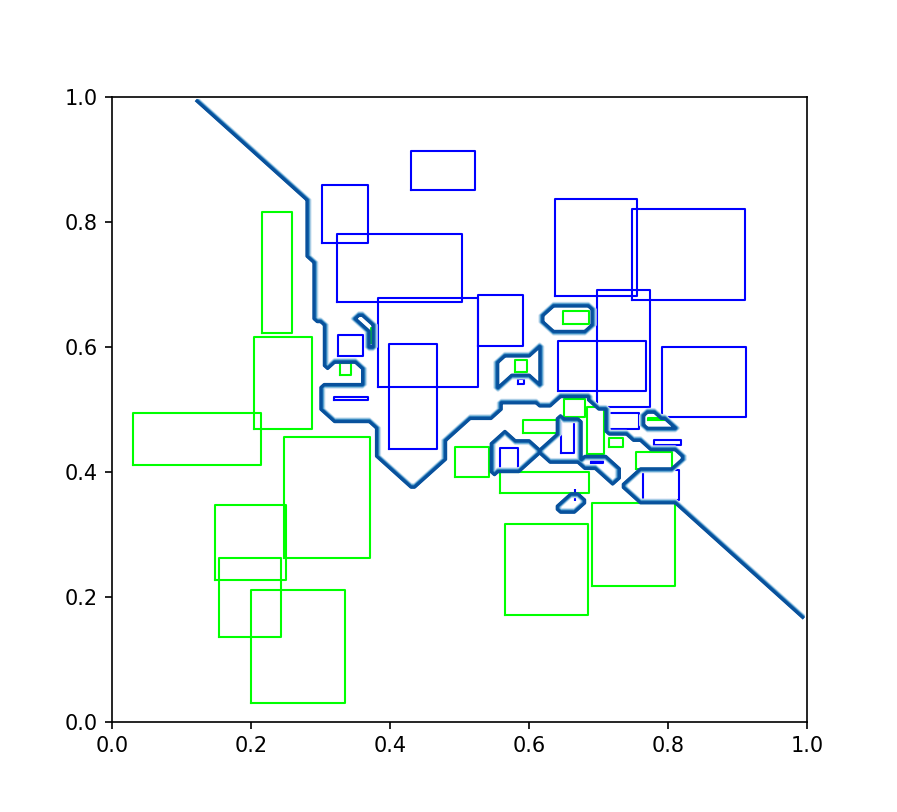

In [52]:
agglo2_clf_labelled_unlabelled.draw_hyperbox_and_boundary("The trained GFMM classifier and its decision boundaries on a mixed labelled and unlabelled dataset")

In [53]:
print("Number of hyperboxes = ", agglo2_clf_labelled_unlabelled.get_n_hyperboxes())

Number of hyperboxes =  42


Similarly to the original online learning algorithm and improved online learning algorithm, the accelerated agglomerative learning algorithm is also capable of learning from a mixed labelled and unlabelled dataset. Unlabelled samples located in the regions surrounded by many samples belonging to only one class were correctly assigned the same class label. The difference between two models trained on the fully labelled dataset and the mixed labelled and unlabelled dataset happends in the unlabelled samples within the overlapping regions between two classes.

#### Prediction

In [54]:
# Using prediction returning only a predicted class for each input sample
y_pred_labelled_unlabelled_agglo2 = agglo2_clf_labelled_unlabelled.predict(Xtest)
acc_agglo2_labelled_unlabelled = accuracy_score(ytest, y_pred_labelled_unlabelled_agglo2)
print(f'Accuracy (trained on a mixed labelled and unlabelled dataset) = {acc_agglo2_labelled_unlabelled * 100: .2f}%')

Accuracy (trained on a mixed labelled and unlabelled dataset) =  87.00%


In [55]:
# Using prediction returning membership values for classes with respect to each input sample
agglo2_clf_labelled_unlabelled.predict_with_membership(Xtest[0:10])

array([[0.98924, 0.98094],
       [0.98112, 0.96336],
       [0.93044, 0.99767],
       [0.98576, 0.93404],
       [0.96956, 1.     ],
       [0.99933, 0.9888 ],
       [0.97989, 0.98306],
       [0.81289, 1.     ],
       [0.9779 , 1.     ],
       [0.94744, 0.9951 ]])

In [56]:
# Using prediction returning probability values for classes with respect to each input sample
agglo2_clf_labelled_unlabelled.predict_proba(Xtest[0:10])

array([[0.50210641, 0.49789359],
       [0.50456677, 0.49543323],
       [0.48256583, 0.51743417],
       [0.51347015, 0.48652985],
       [0.49227239, 0.50772761],
       [0.50264822, 0.49735178],
       [0.49919254, 0.50080746],
       [0.44839455, 0.55160545],
       [0.49441327, 0.50558673],
       [0.48773256, 0.51226744]])

## 4. Agglomerative learning algorithm will a full similarity matrix for GFMM (AGGLO-SM)

In [57]:
from hbbrain.numerical_data.batch_learner.agglo_gfmm import AgglomerativeLearningGFMM

#### 4.1 Training a GFMM model using the agglomerative learning algorithm with a full similarity matrix on a fully labelled training set

In [58]:
agglo_sm_clf_labelled = AgglomerativeLearningGFMM(theta=theta, gamma=gamma, min_simil=min_simil, simil_measure=simil_measure, is_draw=is_draw)
agglo_sm_clf_labelled.fit(Xtr_labelled, ytr_labelled)

AgglomerativeLearningGFMM(min_simil=0, simil_measure='long', theta=0.2)

#### Display decision boundaries among classes if input data are 2-dimensional

<IPython.core.display.Javascript object>


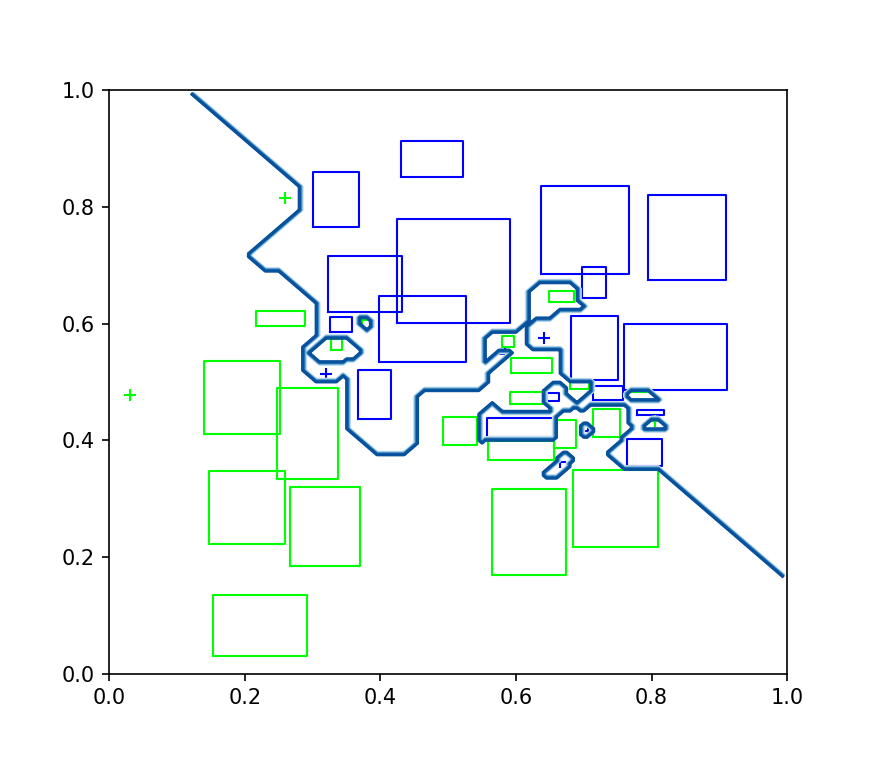

In [59]:
agglo_sm_clf_labelled.draw_hyperbox_and_boundary("The trained GFMM classifier and its decision boundaries on a fully labelled dataset")

In [60]:
print("Number of hyperboxes = ", agglo_sm_clf_labelled.get_n_hyperboxes())

Number of hyperboxes =  45


#### Prediction

In [61]:
# Using prediction returning only a predicted class for each input sample
y_pred_labelled_agglosm = agglo_sm_clf_labelled.predict(Xtest)
acc_agglosm_labelled = accuracy_score(ytest, y_pred_labelled_agglosm)
print(f'Accuracy (trained on a fully labelled dataset) = {acc_agglosm_labelled * 100: .2f}%')

Accuracy (trained on a fully labelled dataset) =  86.20%


In [62]:
# Using prediction returning membership values for classes with respect to each input sample
agglo_sm_clf_labelled.predict_with_membership(Xtest[0:10])

array([[0.98924, 0.98094],
       [0.94134, 0.96336],
       [0.93044, 1.     ],
       [0.98576, 0.93404],
       [0.96956, 1.     ],
       [0.99933, 0.9888 ],
       [0.98227, 0.98306],
       [0.81937, 1.     ],
       [0.9779 , 1.     ],
       [0.94744, 1.     ]])

In [63]:
# Using prediction returning probability values for classes with respect to each input sample
agglo_sm_clf_labelled.predict_proba(Xtest[0:10])

array([[0.50210641, 0.49789359],
       [0.49421956, 0.50578044],
       [0.48198338, 0.51801662],
       [0.51347015, 0.48652985],
       [0.49227239, 0.50772761],
       [0.50264822, 0.49735178],
       [0.49979902, 0.50020098],
       [0.45035919, 0.54964081],
       [0.49441327, 0.50558673],
       [0.48650536, 0.51349464]])

#### 4.2 Training a GFMM model using the agglomerative learning algorithm with a full similarity matrix on a mixed labelled and unlabelled training set

In [64]:
agglo_sm_clf_labelled_unlabelled = AgglomerativeLearningGFMM(theta=theta, gamma=gamma, min_simil=min_simil, simil_measure=simil_measure, is_draw=is_draw)
agglo_sm_clf_labelled_unlabelled.fit(Xtr_labelled_unlabelled, ytr_labelled_unlabelled)

AgglomerativeLearningGFMM(min_simil=0, simil_measure='long', theta=0.2)

#### Display decision boundaries among classes if input data are 2-dimensional

<IPython.core.display.Javascript object>


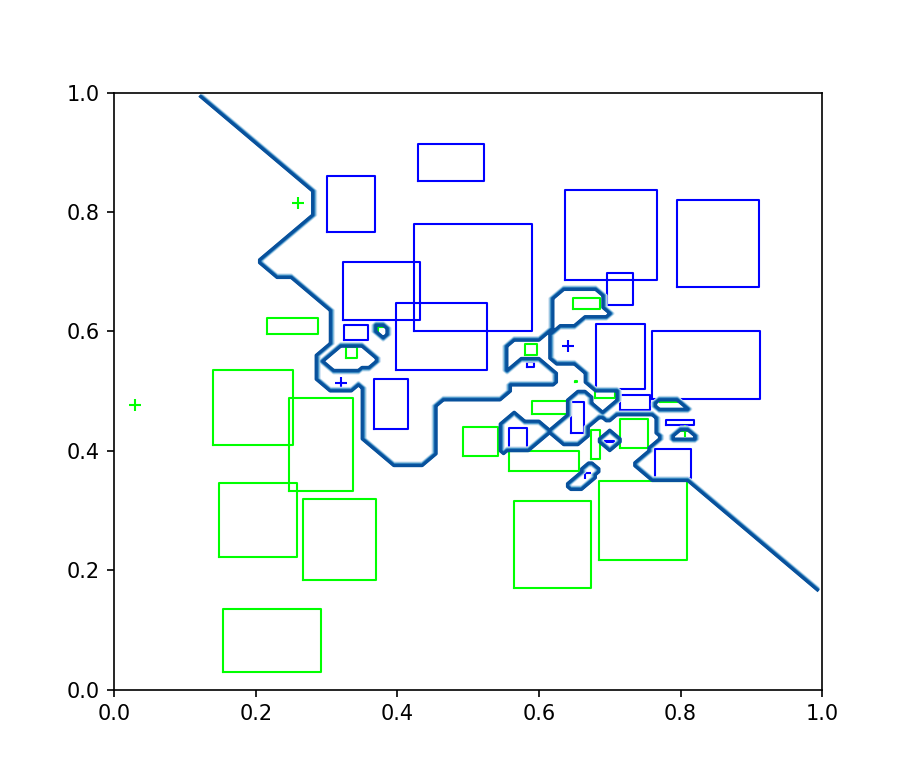

In [65]:
agglo_sm_clf_labelled_unlabelled.draw_hyperbox_and_boundary("The trained GFMM classifier and its decision boundaries on a mixed labelled and unlabelled dataset")

In [67]:
print("Number of hyperboxes = ", agglo_sm_clf_labelled_unlabelled.get_n_hyperboxes())

Number of hyperboxes =  45


We can see that the agglomerative learning algorithm can also learn from a mixed labelled and unlabelled training set. Similarly to above learning algorithms, unlabelled samples surrounded by many samples belonging to only one class were assigned to the same class as their neighbours. The difference between the model trained by the AGGLO-SM algorithm on a fully labelled data set and a mixed labelled and unlabelled data set occurs in the regions that unlabelled samples are surrounded by overlapping labelled samples.

#### Prediction

In [68]:
# Using prediction returning only a predicted class for each input sample
y_pred_labelled_unlabelled_agglosm = agglo_sm_clf_labelled_unlabelled.predict(Xtest)
acc_agglosm_labelled_unlabelled = accuracy_score(ytest, y_pred_labelled_unlabelled_agglosm)
print(f'Accuracy (trained on a mixed labelled and unlabelled dataset) = {acc_agglosm_labelled_unlabelled * 100: .2f}%')

Accuracy (trained on a mixed labelled and unlabelled dataset) =  86.40%


In [69]:
# Using prediction returning membership values for classes with respect to each input sample
agglo_sm_clf_labelled_unlabelled.predict_with_membership(Xtest[0:10])

array([[0.98924, 0.98094],
       [0.94134, 0.96336],
       [0.93044, 1.     ],
       [0.98576, 0.93404],
       [0.96956, 1.     ],
       [0.99933, 0.9888 ],
       [0.98227, 0.98306],
       [0.81937, 1.     ],
       [0.9779 , 1.     ],
       [0.94744, 1.     ]])

In [70]:
# Using prediction returning probability values for classes with respect to each input sample
agglo_sm_clf_labelled_unlabelled.predict_proba(Xtest[0:10])

array([[0.50210641, 0.49789359],
       [0.49421956, 0.50578044],
       [0.48198338, 0.51801662],
       [0.51347015, 0.48652985],
       [0.49227239, 0.50772761],
       [0.50264822, 0.49735178],
       [0.49979902, 0.50020098],
       [0.45035919, 0.54964081],
       [0.49441327, 0.50558673],
       [0.48650536, 0.51349464]])